# Project 7 Machine Learning

### Kelly Bromley
### 06/13/2024

[Project 7 - Machine Learning Repository](https://github.com/K-Bromley/datafun-07-ml)

## Imported Dependencies

In [1345]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Part 1 - Chart a Straight Line

### Demonstrated below is a chart showing the correlation between Celsius and Fahrenheit.

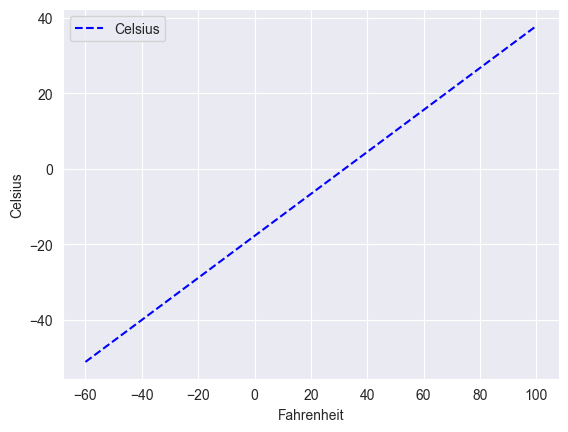

In [1346]:
c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range(-60, 110, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', color='blue', style = '--')
y_label = axes.set_ylabel('Celsius')
x_label = axes.set_xlabel('Fahrenheit')

#### The thing I love about this visual is both Celsius and Fahrenheit are the same at -40 degrees.

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [1347]:
nyc_df = pd.read_csv('data/ave_hi_nyc2_jan_1895-2018.csv')


### Section 2 - Data Inspection

### Show Head

In [1348]:
print(nyc_df.head())

   Date  Value  Anomaly
0  1895   34.2     -3.2
1  1896   34.7     -2.7
2  1897   35.5     -1.9
3  1898   39.6      2.2
4  1899   36.4     -1.0


### Show Tail

In [1349]:
print(nyc_df.tail())

     Date  Value  Anomaly
119  2014   35.5     -1.9
120  2015   36.1     -1.3
121  2016   40.8      3.4
122  2017   42.8      5.4
123  2018   38.7      1.3


### Section 3 - Data Cleaning

In [1350]:
nyc_df.columns = ('Date', 'Temperature', 'Anomaly')

print(nyc_df.head(5))

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9
3  1898         39.6      2.2
4  1899         36.4     -1.0


### Section 4 - Descriptive Statistics

In [1351]:
pd.set_option('display.precision', 2)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


### Section 5 - Build the Model

In [1352]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope
print(f'slope =',linear_regression.slope)

linear_regression.intercept
print(f'intercept =',linear_regression.intercept)

slope = 0.014771361132966163
intercept = 8.694993233674289


### Section 6 - Predict

#### Predicting Temperature for 2024

In [1353]:
nyc_temp_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print(f'nyc_temp_2024:', nyc_temp_2024)

nyc_temp_2024: 38.5922281667978


### Section 7 - Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

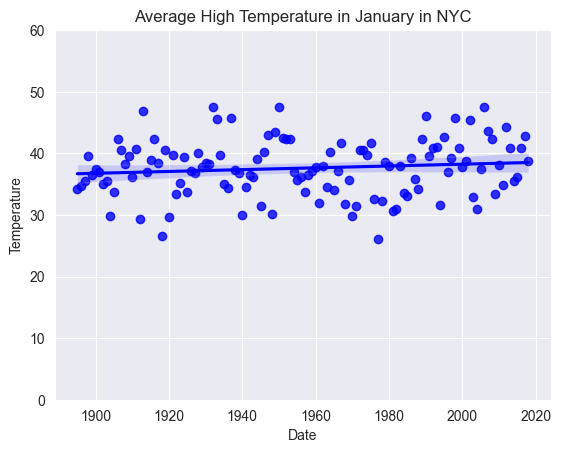

In [1354]:
sns.set_style('darkgrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, color='b')
axes.set_ylim(0, 60)
axes.set_title('Average High Temperature in January in NYC')
plt.show

## Part 3 - Prediction

### Section 1 - Build the Model

In [1355]:

X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values,random_state = 11)


In [1356]:
X_train.shape

(93, 1)

In [1357]:
X_test.shape

(31, 1)

In [1358]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

m = linear_regression.coef_
print(f'Slope =', m)

Slope = [0.01939167]


In [1359]:
b = linear_regression.intercept_
print(f'Y-Intercept =', b)

Y-Intercept = -0.30779820252658396


In [1360]:
print(f'Linear regression is y = {m}x + {b}.')

Linear regression is y = [0.01939167]x + -0.30779820252658396.


### Section 2 - Test the Model

In [1361]:
predicted = linear_regression.predict(X_test)

expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'Predicted: {p:.2f}, Expected: {e:.2f}')

Predicted: 37.86, Expected: 31.70
Predicted: 38.69, Expected: 34.80
Predicted: 37.00, Expected: 39.40
Predicted: 37.25, Expected: 45.70
Predicted: 38.05, Expected: 32.30
Predicted: 37.64, Expected: 33.80
Predicted: 36.94, Expected: 39.70


### Section 3 - Predict

In [1362]:
predict = (lambda x: m * x + b)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

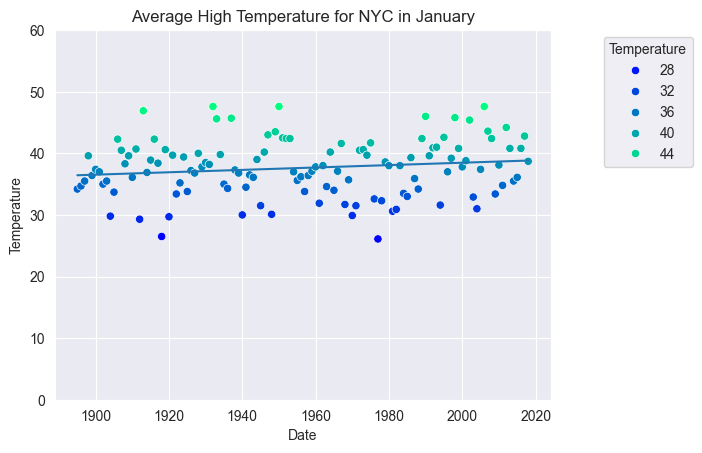

In [1363]:
axes = sns.scatterplot(data=nyc_df, x ='Date', y='Temperature', hue='Temperature', palette = 'winter', legend = True)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
axes.set_title('Average High Temperature for NYC in January')
axes.set_ylim(0,60)
line = plt.plot(x, y)
plt.legend(title='Temperature', bbox_to_anchor= (1.3,1))
plt.show

## Part 4 - Insights and Remarks

#### In Part 2 I began by loading the data into the set from the NYC 2 CSV, I used the second CSV for the data as I did not have to remove the month from the date column. The analysis in Part 2 uses a statistical approach using the data available within the data frame to build the model. Part 3 uses the Machine Learning approach to split the data into train and test datasets. Each method is plotted using a scatter plot with a line corresponding to their linear regression. The models appear to be very similar in nature and the prediction for 2024 in the statistical method is only slightly lower than the prediction for the Machine Learning method.